In [ ]:
# Plots annual mean of EKE and RMSSSH


In [1]:
## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

%matplotlib inline

In [21]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-MAA06-MEAN/NACHOS12.L75-MAA06_y2010.5d_EKE.nc"

ds=xr.open_dataset(file)
eke=ds.voeke[0,0]
lat=ds.nav_lat
lon=ds.nav_lon

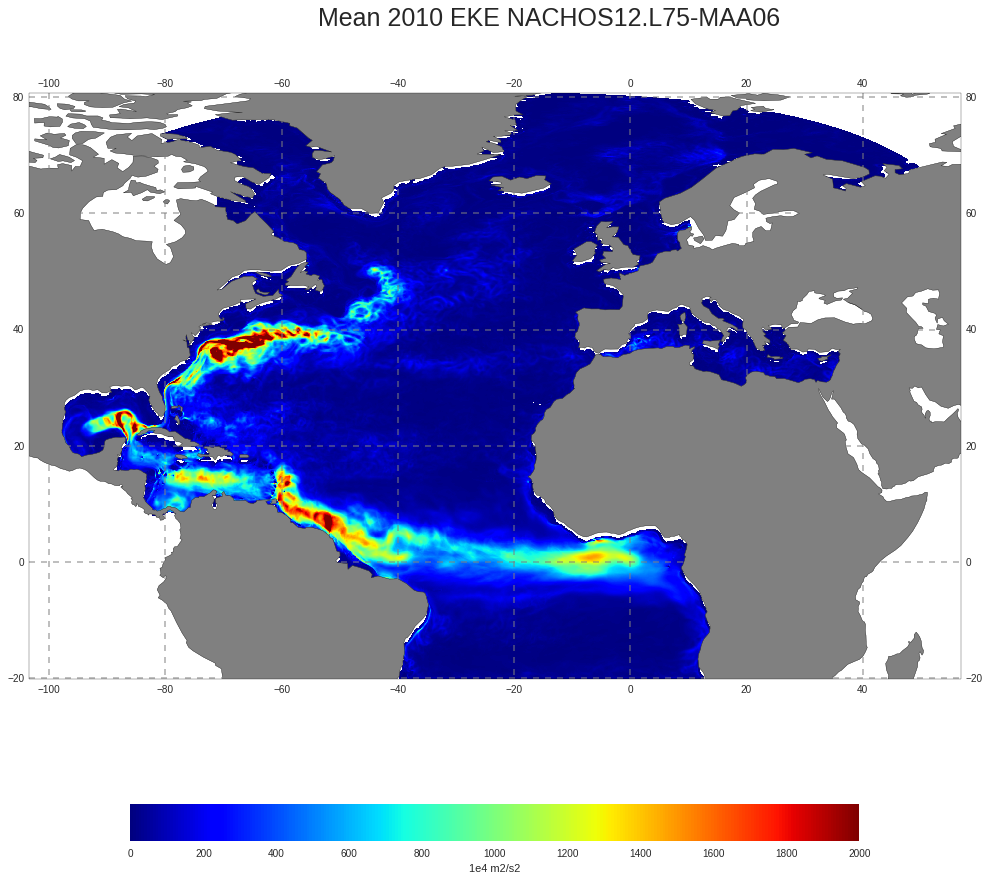

In [24]:

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax1.pcolormesh(lon,lat,10000*ma.masked_invalid(eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
ax1.add_feature(cfeature.LAND,facecolor='grey')
ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='1e4 m2/s2')

fig.suptitle("Mean 2010 EKE NACHOS12.L75-MAA06", fontsize=25)
plt.savefig("eke_mean_nachos12-maa06.png")

In [2]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-MAA06-S/NACHOS12.L75-MAA06_y2010m08d09.5d_gridT.nc"

ds=xr.open_dataset(file)
eke=ds.votemper[0,0]
lat=ds.nav_lat
lon=ds.nav_lon

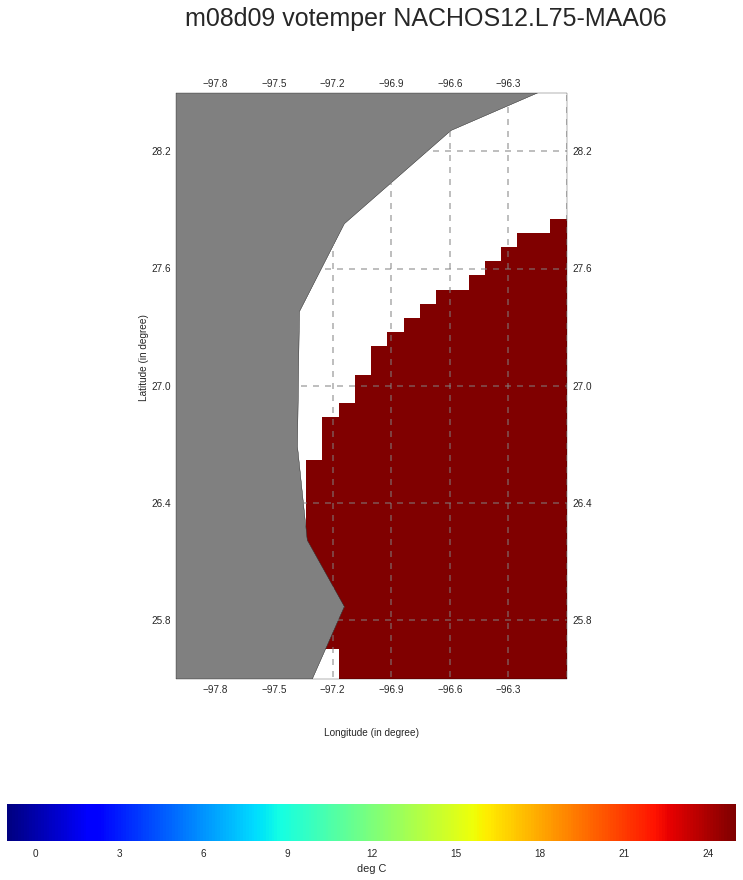

In [10]:

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.set_extent([-98, -96, 25.5, 28.5])
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=-1,vmax=25)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='deg C')

fig.suptitle("m08d09 votemper NACHOS12.L75-MAA06", fontsize=25)
plt.savefig("votemper_m08d09_nachos12-maa06.png")

In [2]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-MAA05-S/NACHOS12.L75-MAA05_y2010m01d01.1d_gridTsurf.nc"

ds=xr.open_dataset(file)
eke=ds.sosstsst[0]
lat=ds.nav_lat
lon=ds.nav_lon

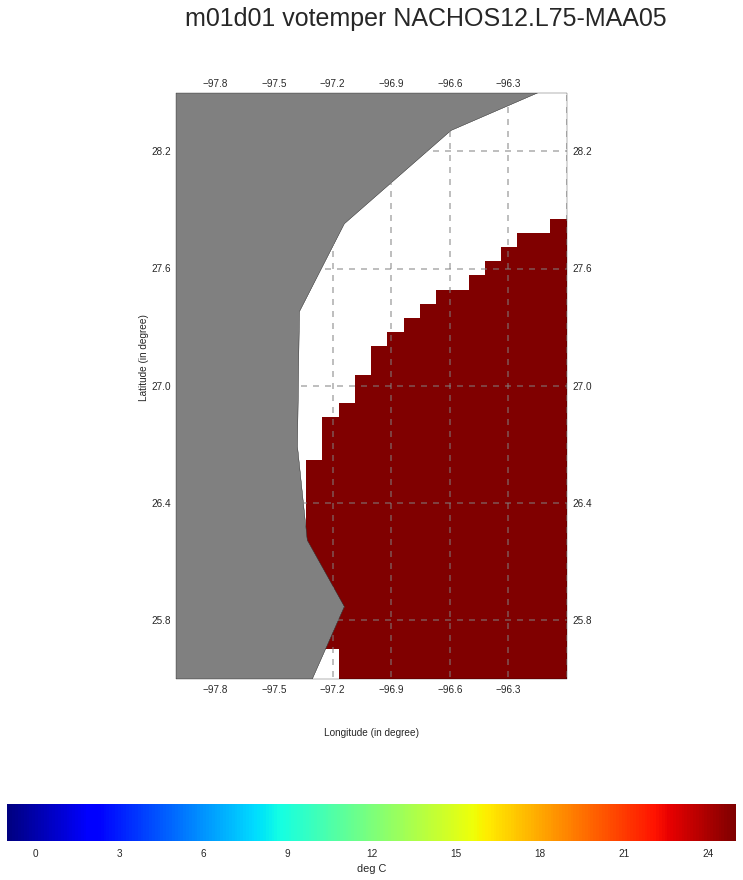

In [11]:

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.set_extent([-98, -96, 25.5, 28.5])
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=-1,vmax=25)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='deg C')

fig.suptitle("m01d01 votemper NACHOS12.L75-MAA05", fontsize=25)
plt.savefig("votemper_m01d01_nachos12-maa05.png")



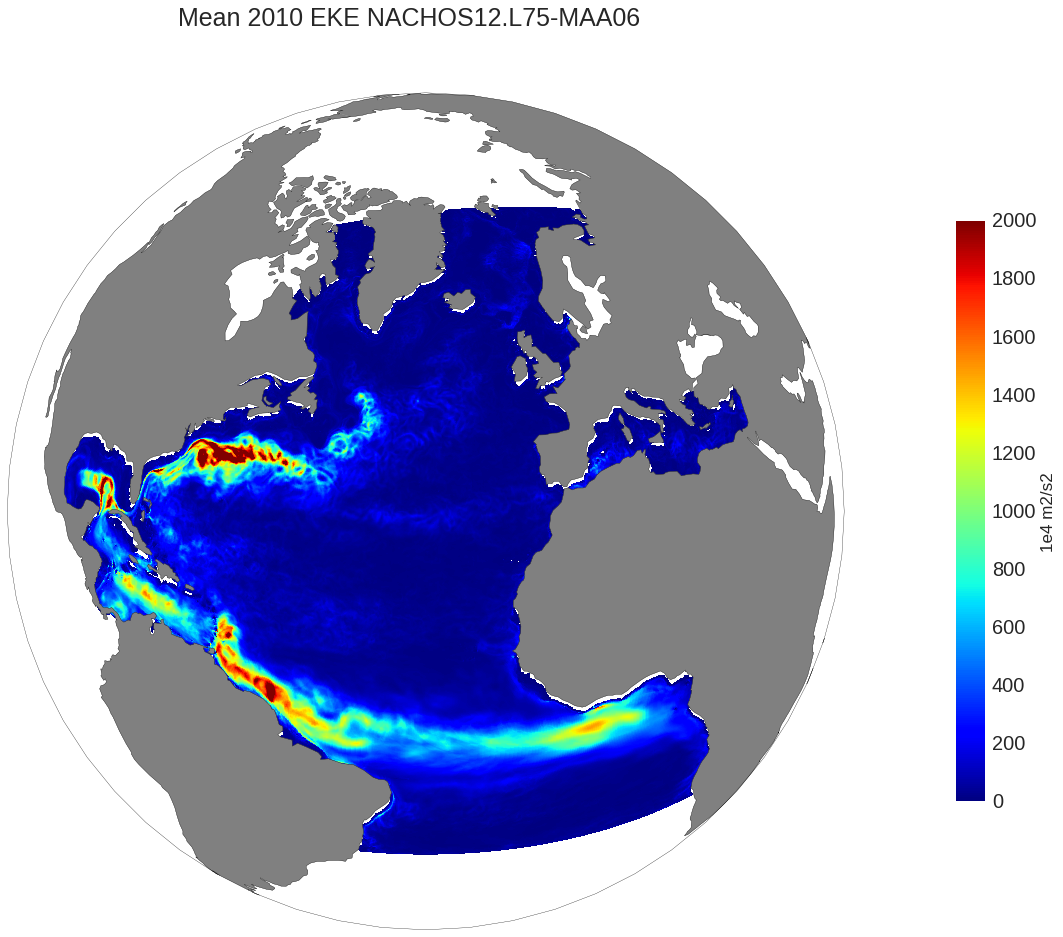

In [25]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,10000*ma.masked_invalid(eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
cbar.set_label("1e4 m2/s2",size=17)
cbar.ax.tick_params(labelsize=20)
fig.suptitle("Mean 2010 EKE NACHOS12.L75-MAA06", fontsize=25)
plt.savefig("eke_mean_nachos12-maa06_ortho.png")

In [16]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-MAA06-MEAN/NACHOS12.L75-MAA06_y2010.5d_RMSSSH.nc"

ds=xr.open_dataset(file)
ssh=ds.sossheig_rms[0]
lat=ds.nav_lat
lon=ds.nav_lon

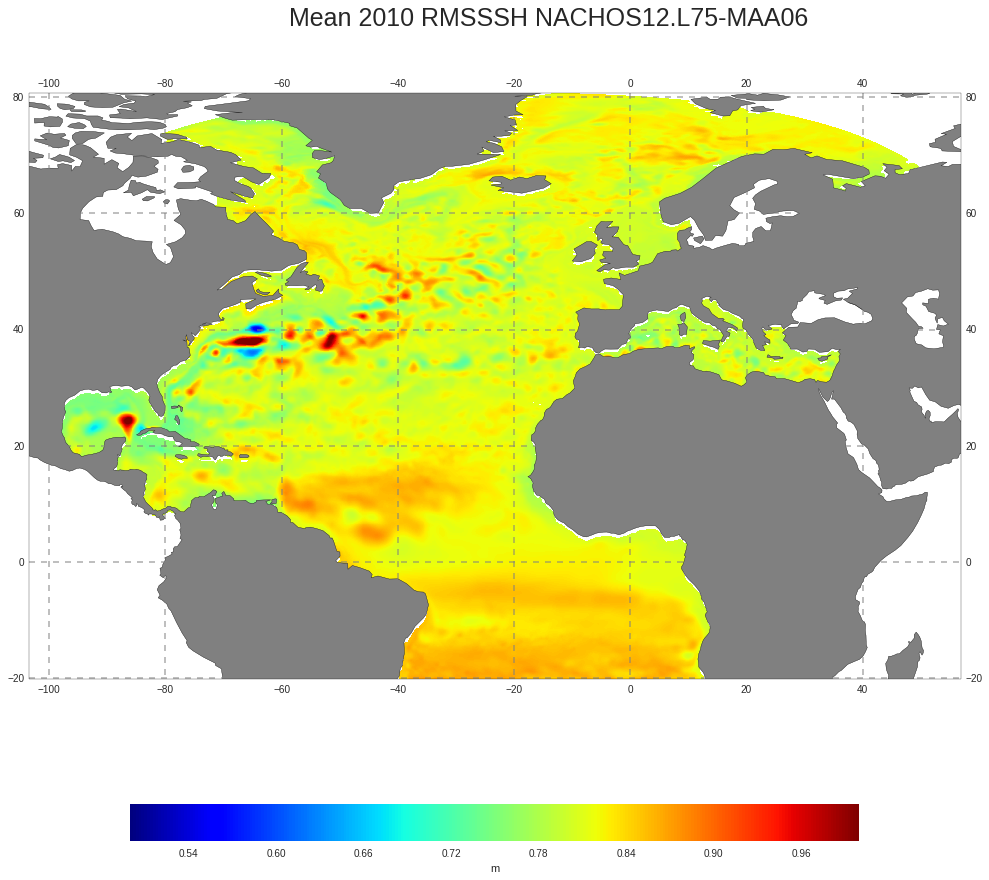

In [26]:

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax1.pcolormesh(lon,lat,ma.masked_invalid(ssh),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0.5,vmax=1)
ax1.add_feature(cfeature.LAND,facecolor='grey')
ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m')

fig.suptitle("Mean 2010 RMSSSH NACHOS12.L75-MAA06", fontsize=25)
plt.savefig("rmsssh_mean_nachos12-maa06.png")